<a href="https://colab.research.google.com/github/anisbagwan/airbnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_Anis_Bagwan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

 cleaning (null values, unwanted columns) - unwanted columns- name,id, last_review, fill null values 0 in ``reviews_per_month``~  
*   EDA
-- number of host in different ``neighbourhood_group``~
-- top 10 host with most number of apartment~
-- top 10 host in different ``neighbourhood_group``~
-- NUmber of  rooms listed in different ``neighbourhood_group``~
-- Number of listed rooms ``category wise``~
-- average pricing  according to apt category grouped  by neighbourhood group and apt category~
-- preferable stay time according to room type
-- Most number of reviews among top hosts


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

# **Initial data check** 

*   Displaying data frame. 



In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
# Columns in dataframe
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Checking the unique elements of neighbourhood_group
df['neighbourhood_group'].unique() 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

*   There are five neighbourhood groups given in the dataset.




In [ ]:
# Checking the unique elements of room_type
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

*   There are three room types available in dataset as 'Private room', 'Entire home/apt', 'Shared room'.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*   ``last_review`` and ``reviews_per_month`` contains some null values




*   There are some irrelevant colmns which we dont need in the dataset like ``name``, ``id``, ``last_review``, ``host_name``.




In [ ]:
# Droping irrelevant columns
df.drop(['id','name','last_review','host_name'],axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

* After dropping four columns dataset has left with 12 columns.


*   Checking null values and replacing them with zero.






In [ ]:
df.isnull().mean()*100

host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

``reviews_per_month`` contains 20% null values. 

In [ ]:
# Replacing null values with 0.
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [ ]:
df.isnull().mean()*100

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

# **Data Analysis** 

**1.**    **Number of host in different neighbourhood_group~** **bold text**



Text(0, 0.5, 'Number of Hosts')

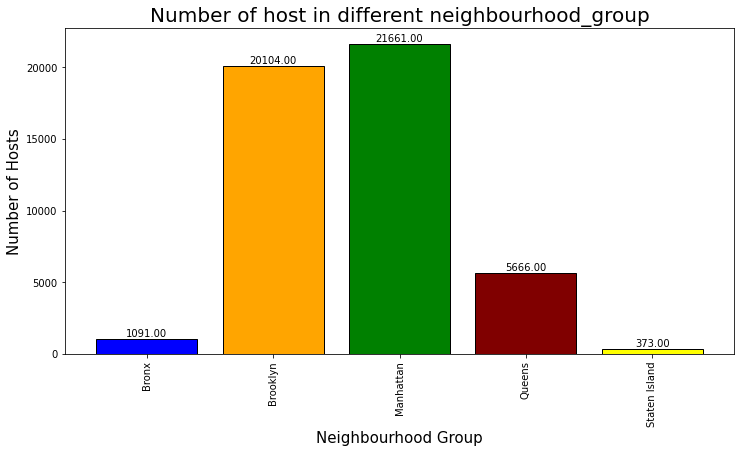

In [ ]:
no_of_host= df.groupby(['neighbourhood_group'])['host_id'].count().plot.bar(
            width=0.8,
            linewidth=1,
            edgecolor='black',
            figsize = (12,6),
            fontsize = 10,
            color=['blue','orange','green','maroon','yellow']) 
plots=no_of_host

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
no_of_host.set_title('Number of host in different neighbourhood_group',fontsize=20)
no_of_host.set_xlabel('Neighbourhood Group',fontsize=15)
no_of_host.set_ylabel('Number of Hosts', fontsize=15)


*  This graph shows that the maximum number of hosts are in Manhattan and Brooklyn.

 **2.**   **Total number of properties by their type**





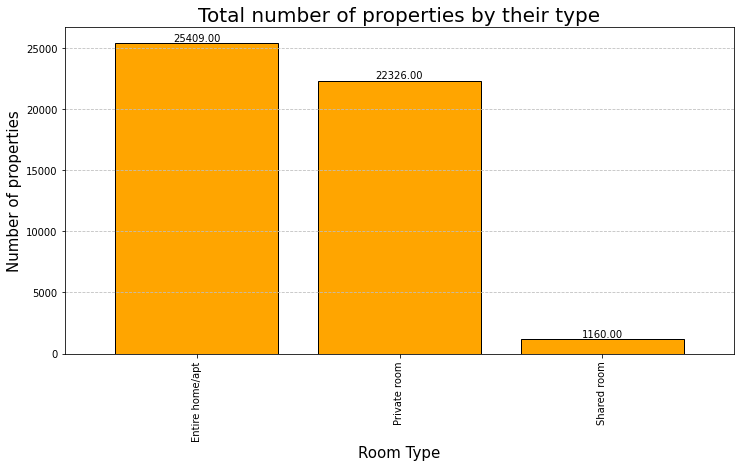

In [ ]:
no_of_rooms=df.groupby(['room_type'])['host_id'].count().plot.bar(              # Grouping room_type and host_id columns by the total count of properties.
            width=0.8,
            linewidth=1,
            edgecolor='black',
            figsize = (12,6),
            fontsize = 10,
            color='orange') 
plots=no_of_rooms                                                               # Declaring no_of_rooms to plots for annoting the bars                                                                  
for bar in plots.patches:                                                       # Iterrating over the bars one-by-one
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
no_of_rooms.set_title('Total number of properties by their type',fontsize=20)   # setting title
no_of_rooms.set_xlabel('Room Type',fontsize=15)                                 # setting x-label
no_of_rooms.set_ylabel('Number of properties', fontsize=15)                          # setting y-label
no_of_rooms.grid(True,axis='y',linestyle='--',color='0.75')                     # setting grids on Y-axis  


* In the above plot we can see that the number of Entire home/apt has maximum listed rooms as compared to other two types.

**3.** **Top 10 host with most number of apartment~**

In [ ]:
# Checking host count by which we can get the total properties of that specific host
hosts_count=pd.DataFrame(df['host_id'].value_counts())

In [ ]:
# Renaming columns and resetting the indexes
hosts_count=hosts_count.reset_index().rename(columns = {'index':"host_id", 'host_id':'Number of listed apt'})

In [ ]:
# Taking top 10 hosts which have the most number of properties
top_10_hosts=hosts_count.head(10)
top_10_hosts

,host_id,Number of listed apt
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


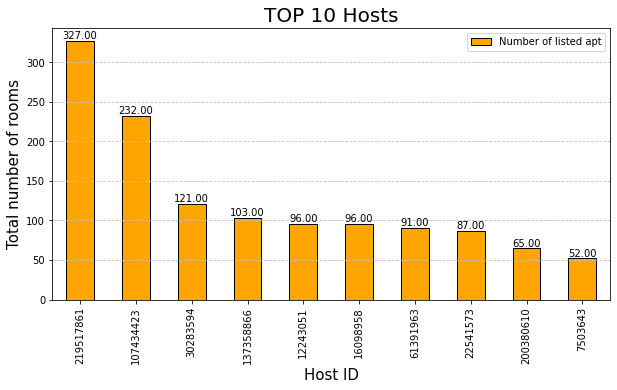

In [ ]:
plots= top_10_hosts.plot.bar(x ='host_id', y = 'Number of listed apt', 
                             color='orange',figsize = (10,5),edgecolor='black')

for bar in plots.patches:                                                       # Iterrating over the bars one-by-one
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                 # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
plt.xlabel("Host ID",fontsize=15)                                               # setting x-label
plt.ylabel("Total number of rooms",fontsize=15)                                 # setting y-label
plt.title("TOP 10 Hosts",fontsize=20)                                           # setting title
plt.grid(True, axis='y',linestyle='--',color='0.75')                            # setting grid
plt.show()

*  The host ID 219517861 has highest number of listed properties. 

**4.** **Top 10 host in different neighbourhood_group~** :'Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx'

In [ ]:
# Creating a copy of original df but only for those prices which are less than 400$
new_df=df[df.price<400]

* Manhattan 

In [ ]:
# Creating new dataset of Manhattan
Manhattan_df=new_df[new_df['neighbourhood_group']=='Manhattan']
Manhattan_df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [ ]:
# Top hosts in manhattan
top_hosts_manhattan=Manhattan_df['host_id'].value_counts()

In [ ]:
# Resetting index
top_hosts_manhattan= top_hosts_manhattan.reset_index()

In [ ]:
# Renaming columns
top_hosts_manhattan.rename(columns={'index':"host_id", 'host_id':'Number of listed apt'},inplace=True)

In [ ]:
# Taking top 10 hosts into consideration
top_10_hosts_manhattan= top_hosts_manhattan.head(10)
top_10_hosts_manhattan

,host_id,Number of listed apt
0,219517861,284
1,107434423,218
2,30283594,113
3,12243051,96
4,16098958,93
5,61391963,91
6,22541573,86
7,200380610,54
8,1475015,52
9,120762452,50


*  Aboe **dataset** gives the top 10 hosts of Manhattan city.
----------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------

*  Brooklyn

In [ ]:
# Creating new dataset of Brooklyn 
Brooklyn_df=new_df[new_df['neighbourhood_group']=='Brooklyn']
Brooklyn_df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365


In [ ]:
# Top hosts in Brooklyn
top_hosts_Brooklyn=Brooklyn_df['host_id'].value_counts()

In [ ]:
# Resetting index
top_hosts_Brooklyn= top_hosts_Brooklyn.reset_index()

In [ ]:
# Renaming columns
top_hosts_Brooklyn.rename(columns={'index':"host_id", 'host_id':'Number of listed apt'},inplace=True)

In [ ]:
# Taking top 10 hosts into consideration
top_10_hosts_Brooklyn= top_hosts_Brooklyn.head(10)
top_10_hosts_Brooklyn

,host_id,Number of listed apt
0,7503643,52
1,26377263,35
2,119669058,34
3,226410657,27
4,417504,26
5,230192510,25
6,213781715,23
7,16437254,21
8,9864136,19
9,159091490,17


*  Above dataset gives the top 10 hosts of Manhattan city.
---------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

*  Queens

In [ ]:
# Creating new dataset of Queens
Queens_df=new_df[new_df['neighbourhood_group']=='Queens']
Queens_df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
46,50124,Queens,Long Island City,40.74771,-73.9474,Private room,130,3,248,2.25,1,215


In [ ]:
# Top hosts in Brooklyn
top_hosts_Queens=Queens_df['host_id'].value_counts()

In [ ]:
# Resetting index
top_hosts_Queens= top_hosts_Queens.reset_index()

In [ ]:
# Renaming columns
top_hosts_Queens.rename(columns={'index':"host_id", 'host_id':'Number of listed apt'},inplace=True)

In [ ]:
# Taking top 10 hosts into consideration
top_10_hosts_Queens= top_hosts_Queens.head(10)
top_10_hosts_Queens

,host_id,Number of listed apt
0,137358866,79
1,19303369,29
2,242962235,23
3,134184451,18
4,3250450,16
5,200239515,15
6,5962328,15
7,65809485,12
8,175730239,12
9,263053182,10


*  Above dataset gives the top 10 hosts of Queens city.
---------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

* Staten island

In [ ]:
# Creating new dataset of Staten island
island_df=new_df[new_df['neighbourhood_group']=='Staten Island']
island_df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,1.66,1,312


In [ ]:
# Top hosts in Staten island
top_hosts_island=island_df['host_id'].value_counts()

In [ ]:
# Resetting index
top_hosts_island= top_hosts_island.reset_index()

In [ ]:
# Renaming columns
top_hosts_island.rename(columns={'index':"host_id", 'host_id':'Number of listed apt'},inplace=True)

In [ ]:
# Taking top 10 hosts into consideration
top_10_hosts_island= top_hosts_island.head(10)
top_10_hosts_island

,host_id,Number of listed apt
0,104812805,8
1,50756378,7
2,104927746,7
3,137999892,7
4,117492425,6
5,303939,6
6,99202586,5
7,92493393,5
8,128338539,4
9,43392243,4


*  Above dataset gives the top 10 hosts of Staten Island.
--------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------

*  Bronx

In [ ]:
# Creating new dataset of Staten island
Bronx_df=new_df[new_df['neighbourhood_group']=='Bronx']
Bronx_df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,190409,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353


In [ ]:
# Top hosts in Staten island
top_hosts_Bronx=Bronx_df['host_id'].value_counts()

In [ ]:
# Resetting index
top_hosts_Bronx= top_hosts_Bronx.reset_index()

In [ ]:
# Renaming columns
top_hosts_Bronx.rename(columns={'index':"host_id", 'host_id':'Number of listed apt'},inplace=True)

In [ ]:
# Taking top 10 hosts into consideration
top_10_hosts_island= top_hosts_island.head(10)
top_10_hosts_island

,host_id,Number of listed apt
0,104812805,8
1,50756378,7
2,104927746,7
3,137999892,7
4,117492425,6
5,303939,6
6,99202586,5
7,92493393,5
8,128338539,4
9,43392243,4


*  Above dataset gives the top 10 hosts of Bronx.
--------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------

**5.** **Average pricing according to apartment category grouped by neighbourhood group~**

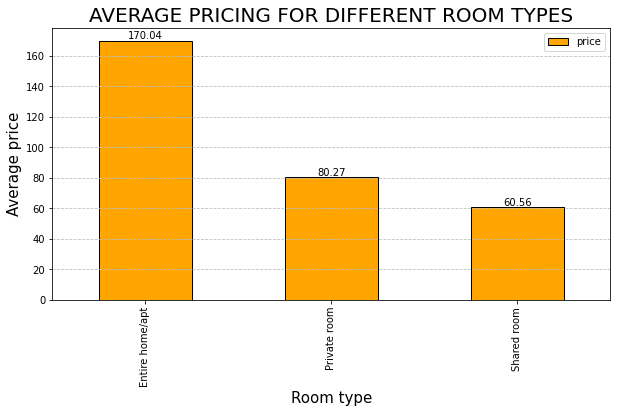

In [ ]:
plots= pd.DataFrame(new_df.groupby(['room_type'])['price'].mean()).plot.bar(color ='orange', figsize=(10,5), edgecolor= 'black')

for bar in plots.patches:                                                       # Iterrating over the bars one-by-one  
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
plt.xlabel('Room type', fontsize=15)                                            # setting x-label
plt.ylabel('Average price', fontsize=15)                                        # setting y-label
plt.title('AVERAGE PRICING FOR DIFFERENT ROOM TYPES', fontsize=20)              # setting title  
plt.grid(axis='y',linestyle='--',color='0.75')                                  # seetting grid
plt.show()

*  From above graph we can conclude that the Entire home/apt has maximum price range compared to Private room and Shared room prices.

*  Average prices of rooms in neighbourhood

In [ ]:
neigh_grp_price= pd.DataFrame(new_df.groupby(['room_type','neighbourhood_group'])['price'].mean())
neigh_grp_price

price
room_type       neighbourhood_group            
Entire home/apt Bronx                117.040541
                Brooklyn             153.461983
                Manhattan            191.241776
                Queens               134.513659
                Staten Island        121.089286
Private room    Bronx                 60.595679
                Brooklyn              70.654789
                Manhattan            100.657548
                Queens                66.452813
                Staten Island         62.292553
Shared room     Bronx                 47.254237
                Brooklyn              48.036496
                Manhattan             78.848936
                Queens                46.989691
                Staten Island         57.444444

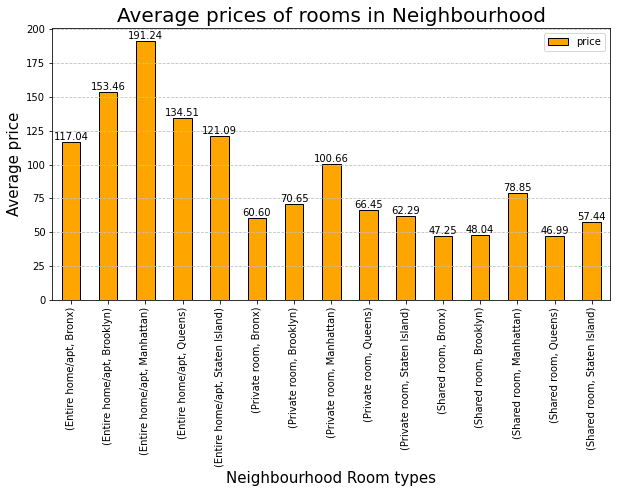

In [ ]:
plots=neigh_grp_price.plot.bar(color ='orange', figsize=(10,5), edgecolor= 'black')

for bar in plots.patches:                                                       # Iterrating over the bars one-by-one
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
plt.xlabel('Neighbourhood Room types', fontsize=15)                             # setting x-label
plt.ylabel('Average price', fontsize=15)                                        # setting y-label
plt.title('Average prices of rooms in Neighbourhood', fontsize=20)              # setting title
plt.grid(axis='y',linestyle='--',color='0.75')                                  # setting grid
plt.show()

* From above plot we can conclude that the average price of Entire home/apartment in Manhattan is much higher than any other neighbourhood.

**6.** **Preferable average stay time according to room type**

In [ ]:
avg_stay=pd.DataFrame(new_df.groupby(['room_type'])['minimum_nights'].mean().reset_index())

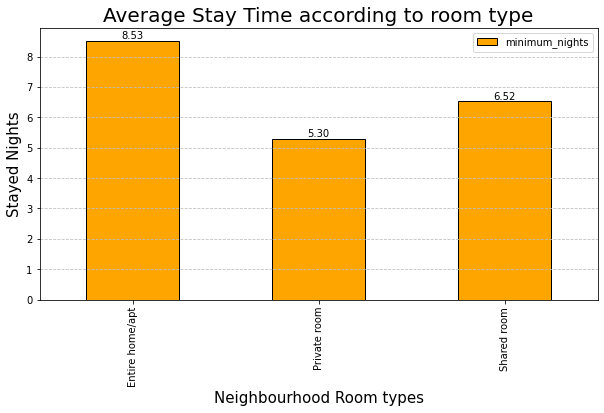

In [ ]:
plots=avg_stay.plot.bar(color ='orange', figsize=(10,5), edgecolor= 'black',x='room_type')
for bar in plots.patches:                                                       # Iterrating over the bars one-by-one
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
  
plt.xlabel('Neighbourhood Room types', fontsize=15)                             # setting x-label
plt.ylabel('Stayed Nights', fontsize=15)                                        # setting y-label
plt.title('Average Stay Time according to room type', fontsize=20)              # setting title
plt.grid(axis='y',linestyle='--',color='0.75')                                  # setting grid
plt.show()

**6.**  **Most number of reviews among top hosts.**

In [ ]:
# For considering reviews we have taken some columns like 'price', 'Number_of_reviews', 'host_id' in a seperate dataframe   
reviews=new_df[['host_id','number_of_reviews',"price"]]

In [ ]:
# Sorting the dataframe by the number of reviews in Descending order
reviews.sort_values('number_of_reviews',ascending=False,inplace=True)

In [ ]:
# Taking top 10 reivews into consideration
top_10_reviews=reviews.head(10)
top_10_reviews

,host_id,number_of_reviews,price
11759,47621202,629,47
2031,4734398,607,49
2030,4734398,597,49
2015,4734398,594,49
13495,47621202,576,47
10623,37312959,543,46
1879,2369681,540,99
20403,26432133,510,48
4870,12949460,488,160
471,792159,480,60


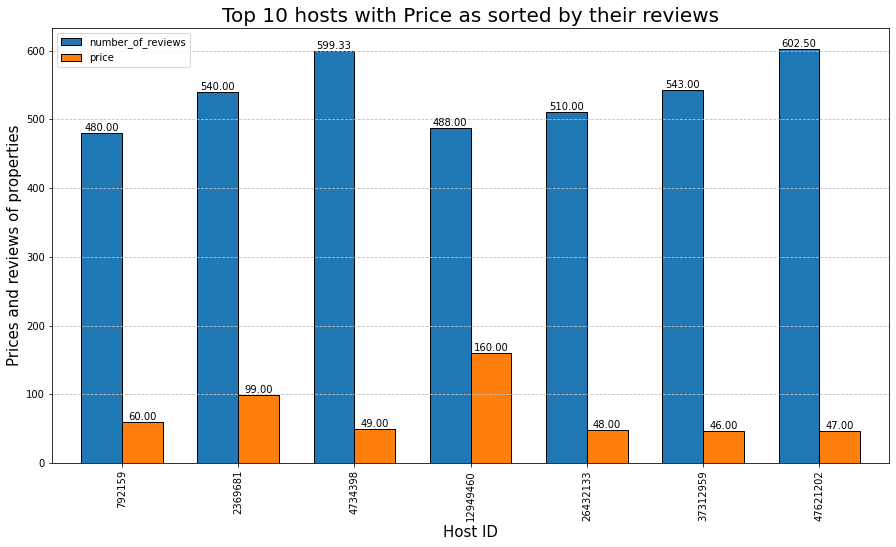

In [ ]:
plots= top_10_reviews.groupby(['host_id'])[['number_of_reviews','price']].mean().plot.bar(
    width=0.7,                                                                  
    linewidth=1,
    edgecolor='black',
    figsize = (15,8),
    fontsize = 10,)

for bar in plots.patches:                                                       # Iterrating over the bars one-by-one to anotate the bars
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.xlabel('Host ID', fontsize=15)                                              # setting x-label
plt.ylabel('Prices and reviews of properties', fontsize=15)                     # setting y-label
plt.title('Top 10 hosts with Price as sorted by their reviews', fontsize=20)    # setting title
plt.grid(axis='y',linestyle='--',color='0.75')                                  # setting grid
plt.show()

*  From above plot we can conclude that the host id having maximum price of property have less number of reviews and the host id with minimum price have more number reviews.  

# **Conclusion**

From the above data analysis project, we have analyzed some of the most popular trends given the Airbnb's data on listings in NYC

We can conclude:-

*   Manhattan and Brooklyn are the prime locations with highest number of rooms.

*   Manhattan is the most expensive place to live.

*   In Manhattan people perfer to rent entire home and apartment.

*   Staten island is the least popular place amoung them.

*   Most properties have price in the range 0-150.

*   Prices very wildly based on property and room types.

*  Majority of Hosts listed their entire home property. 

*   People prefer to list there properties for minimun number of nights less than a week .

*   The properties which are expensive tend to attract less reviews, which means people less likely to rent expensive rooms.